In [1]:
#  For sting e changes I made in python files

In [2]:
from config import config
from tqdm import tqdm
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np
import matplotlib.pyplot as plt
from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
import pickle
from scipy.interpolate import UnivariateSpline
from constants import pdm_constants
import csv
from matplotlib.lines import Line2D
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [3]:
# Parameters ---
config["general"]["detector"] = "IceCube"
config["general"]["year"] = 9
mass_grid = np.logspace(2, 6, 9) # np.logspace(1, 6, 10)
sv_grid = np.logspace(-26, -21, 9) # 10
mass_ext = np.logspace(2, 6, 131)
angle = config['atmospheric showers']['theta angles']
b = Atm_Shower()
mass_id = 4
sv_id = -1

#mass_grid_1 = np.logspace(2, 6, 6)
#sv_grid_1 =  np.logspace(-25, -21, 6)

mass_grid_1=[     5,      6,      8,     10,     15,     20,     25,     30,
           40,     50,     60,     70,     80,     90,    100,    110,
          120,    130,    140,    150,    160,    180,    200,    220,
          240,    260,    280,    300,    330,    360,    400,    450,
          500,    550,    600,    650,    700,    750,    800,    900,
         1000,   1100,   1200,   1300,   1500,   1700,   2000,   2500,
         3000,   4000,   5000,   6000,   7000,   8000,   9000,  10000,
        12000,  15000,  20000,  30000,  50000, 100000]


std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot
lw=0.1 # Linewidth
h_length=0.7  # Handle length for the legends
export_dpi = 500  # Dpi for the image export

ICeCube... Effective Areas


In [4]:
color_pone='#7570b3'
color_ice='#e7298a'
color_combined='#33a02c'
color_thermal='#1f78b4'
color_unitary='k'

In [5]:
surface_fluxes = pickle.load(open("../data/surf_store_v1.p", "rb"))
shower = surface_fluxes[20][3] # background fluxes at 20° ----

In [6]:
dm = DM2Nu()

In [17]:
limits_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/19_08_22/data/limits_results.pkl','rb'))
limits_ice_old = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/18_04_desk/data/limits_results_IceCube.pkl','rb'))
limits_ice_DM = pickle.load(open("/home/kruteesh/Desktop/dm_data_server/28_04_DM/limits_results.pkl", "rb"))

limits_com_unsm = pickle.load(open('../data/06_04/unsmeared/limits_results_combined_un.pkl', 'rb'))
limits_com_sm = pickle.load(open('../data/06_04/smeared/limits_results_combined_sm.pkl', 'rb'))

limits_pone_unsm = pickle.load(open('../data/nfw_unsmea_limits.pkl', 'rb'))
#limits_pone_sm = pickle.load(open('../data/06_04/smeared/limits_results_POne_sm.pkl', 'rb'))
#limits_pone_sm_old = pickle.load(open('../data/28_03_02/smeared/limits_results_POne_sm.pkl', 'rb'))
#limits_pone_45_25= pickle.load(open("../data/14_04/smeared/45_25/limits_results_POne_sm_NFW.pkl","rb"))

#limits_pone_unsm = pickle.load(open('../data/tmp_files/unsmeared/limits_results_POne_un_NFW.pkl', 'rb'))
limits_pone_sm = pickle.load(open('../data/tmp_files/smeared/limits_results_POne_sm_NFW.pkl', 'rb'))


limits_pone_bb_un = pickle.load(open('../data/limits_results_POne_un_NFW_bb.pkl', 'rb'))


limits_com_sm_old = pickle.load(open('../data/28_03_02/smeared/limits_results_combined_sm.pkl', 'rb'))

In [18]:
# Limits data Loading 

#cl_lit = np.loadtxt('/home/kruteesh/Desktop/DM_nu_simulation_P-One/Literature/limits_Ice.csv', delimiter=",")
#cl_lit = (cl_lit[cl_lit[:, 0].argsort()])

cl_lit_HE = np.loadtxt('../data/IceCube_HE.csv', delimiter=",")
cl_lit_HE = (cl_lit_HE[cl_lit_HE[:, 0].argsort()])
cl_lit = np.loadtxt('../data/CL_PONE.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])

cl_lit_bb = np.loadtxt('../data/artsen_limits_bb.csv', delimiter=',')
cl_lit_bb = (cl_lit_bb[cl_lit_bb[:, 0].argsort()])

th_cl = np.loadtxt(open("../data/thermal_relic.csv"), delimiter = ",")
th_cl = (th_cl[th_cl[:, 0].argsort()])
unitarity = np.loadtxt(open('../data/Unitarity_bound.csv'), delimiter = ',')
unitarity = (unitarity[unitarity[:, 0].argsort()])

m_1e4 = np.loadtxt("../data/m_1e4.csv",delimiter=",")
m_1e4 = (m_1e4[m_1e4[:, 0].argsort()])
m_1e2 = np.loadtxt("../data/m_1e2.csv",delimiter=",")
m_1e2 = (m_1e2[m_1e2[:, 0].argsort()])
m_1e6 = np.loadtxt("../data/m_1e6.csv",delimiter=",")
m_1e6 = (m_1e6[m_1e6[:, 0].argsort()])

#l_c_un = np.loadtxt('../data/limits_combined_un.csv',  delimiter=',')
#l_c_un = (l_c_un[l_c_un[:, 0].argsort()])

#l_c_sm = np.loadtxt('../data/limits_combined_sm.csv',  delimiter=',')
#l_c_sm = (l_c_sm[l_c_sm[:, 0].argsort()])


In [19]:

xx,yy = np.meshgrid(np.log10(mass_grid),np.log10(sv_grid))

xx_1,yy_1 = np.meshgrid(np.log10(mass_grid_1),np.log10(sv_grid))


In [23]:
#sp_c_un = UnivariateSpline(l_c_un[:,0], l_c_un[:,1], k=5, s=1)
#sp_c_sm = UnivariateSpline(l_c_sm[:,0], l_c_sm[:,1], k=5, s=1)
limits_pone_unsm

{(2,
  3,
  50,
  2): {'numu': array([[1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
          9.98314223e-001, 9.98718725e-001, 9.99341763e-001,
          9.99789629e-001, 9.99961015e-001, 9.99995688e-001],
         [1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
          9.70442504e-001, 9.77458674e-001, 9.88359140e-001,
          9.96265607e-001, 9.99306968e-001, 9.99923325e-001],
         [1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
          5.86525379e-001, 6.66686980e-001, 8.12027294e-001,
          9.35632750e-001, 9.87747369e-001, 9.98637389e-001],
         [1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
          7.57690840e-005, 7.39334051e-004, 2.46554583e-002,
          3.06318725e-001, 8.03135491e-001, 9.76044058e-001],
         [1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
          5.31931007e-074, 2.08563845e-056, 2.53350285e-029,
          7.29004066e-010, 2.02711857e-002, 6.49735956e-001],
         [1.00000000e+000, 1.00000000e+000, 1.00000

/tmp/ipykernel_4569/981878546.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth', 'labels'
  C_pone_unsm = ax1.contour(xx,yy, limits_pone_unsm[2, 3, 50, 2]['numu'], linestyles='--', linewidth=15, colors=color_pone, labels= r'P-ONE unsmeared', levels=[0.95])
/tmp/ipykernel_4569/981878546.py:18: UserWarning: The following kwargs were not used by contour: 'linewidth', 'labels'
  C_pone_sm = ax1.contour(xx,yy, limits_pone_sm[i], linestyles='-.', linewidth=15,colors=color_pone, labels=r'P-ONE smeared', levels=[0.95])


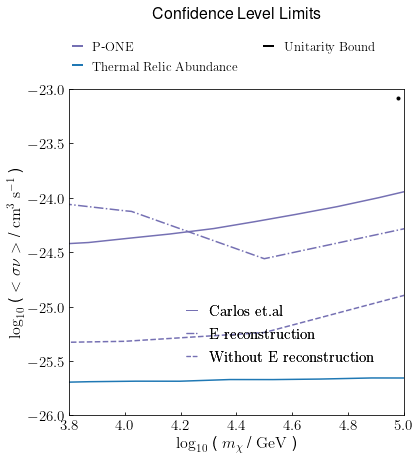

In [25]:
# Limits Comparision ---- TODO: low mass cutoff
#figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
p_name = [r'$\nu_{\mu}$', r'$\nu_{e}$', r'$\nu_{\tau}$']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)

smoothing_val = 3

#ax1.fill_between(np.log10(mass_ext), 
#  sp_c_sm(np.log10(mass_ext)),
#    sp_c_un(np.log10(mass_ext)),
#
#    color='yellow', alpha=0.5
#)

for j,i in enumerate(['numu', 'nue', 'nutau']):
    C_pone_unsm = ax1.contour(xx,yy, limits_pone_unsm[2, 3, 50, 2]['numu'], linestyles='--', linewidth=15, colors=color_pone, labels= r'P-ONE unsmeared', levels=[0.95])
    C_pone_sm = ax1.contour(xx,yy, limits_pone_sm[i], linestyles='-.', linewidth=15,colors=color_pone, labels=r'P-ONE smeared', levels=[0.95])
    break
#C_pone_sm_old =  ax1.contour(xx,yy, limits_pone_sm_old[i], linestyles='dotted', linewidth=15,colors=color_pone, levels=[0.9]) 
#C_ice = ax1.contour(xx,yy, limits_ice[i],linestyles='--', linewidth=3, colors=color_ice, labels=r'IceCube simulation', levels=[0.9])
#C_ice_DM = ax1.contour(xx,yy, limits_ice_DM[i],linestyles='-.', linewidth=3, colors=color_ice, labels=r'IceCube simulation', levels=[0.9])

#C_com_unsm = ax1.contour(xx,yy, limits_com_unsm[i], linestyles='-', linewidth=15, colors=color_combined, labels=r'Combined', levels=[0.9])
#C_com_sm = ax1.contour(xx,yy, limits_com_sm[i], linestyles='-.', linewidth=15, colors=color_combined, labels=r'Combined P-ONE smeared', levels=[0.9])
#C_com_sm_old = ax1.contour(xx,yy, limits_com_sm_old[i], colors=color_combined, linewidth=15, linestyles='dotted', levels=[0.9])

#ax1.plot(np.log10(cl_lit_HE[:, 0]), np.log10(cl_lit_HE[:, 1]), color_ice , label=r'IceCube')
ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), color_pone, label=r'$\textrm{P}$-$\textrm{ONE}$')
ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), color=color_thermal, 
     label=r'$\textrm{Thermal Relic Abundance}$')
ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '.',color=color_unitary, 
     label=r'$\textrm{Unitarity Bound}$')

#h_ice, l_ice= C_ice.legend_elements()
#h_com_unsm, l_com_unsm = C_com_unsm.legend_elements()
#h_com_sm, l_com_sm = C_com_sm.legend_elements() 
h_pone_unsm, l_pone_unsm = C_pone_unsm.legend_elements()
h_pone_sm, l_pone_sm = C_pone_sm.legend_elements()
C_s = [C_pone_unsm, C_pone_sm] # [C_ice, C_com_unsm, C_com_sm,
h_list = [h_pone_unsm[0], h_pone_sm[0]] # h_ice[0], h_com_unsm[0], h_com_sm[0],
labels = [l_pone_unsm, l_pone_sm] # l_ice, l_com_unsm, l_com_sm, , l_com_sm
for k in range(0, len(labels)):
    ax1.clabel(C_s[k], inline=1, fontsize=fontsize)
    C_s[k].collections[0].set_label(labels[k])
#C_s[1].collections[0].set_label(labels[1])

h, l = ax1.get_legend_handles_labels()
legend_elements_s = [Line2D([0], [0], color=color_pone, lw=2),
                   Line2D([0], [0], color=color_thermal,  lw=2),
                   Line2D([0], [0], color=color_unitary,  lw=2)
                  ]
labels_s = [r'$\textrm{P}$-$\textrm{ONE}$',
          r'$\textrm{Thermal Relic Abundance}$',
          r'$\textrm{Unitarity Bound}$',
          ]

lgd1 = ax1.legend(legend_elements_s, labels_s, loc=7, bbox_to_anchor=(0.95, +1.1),
             ncol=2, fontsize=fontsize-2, handlelength=h_length,
             fancybox=True, frameon=False)



legend_elements = [Line2D([0], [0], color=color_pone, lw=1),
                   Line2D([0], [0], linestyle='-.', color=color_pone,  lw=1.2),
                   Line2D([0], [0], linestyle='--', color=color_pone,  lw=1.2)
                  ]
labels = [r'$\textrm{Carlos et.al}$',
          r'$\textrm{E reconstruction}$',
          r'$\textrm{Without E reconstruction}$']
lgd2= ax1.legend(legend_elements, labels, loc=7, bbox_to_anchor=(0.95, 0.25),
                 ncol=1, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd2)            
#lgd2 = ax1.legend(h_list, labels, loc=7, bbox_to_anchor=(0.8, +0.3),
#             fontsize=fontsize-2, handlelength=h_length, 
#             fancybox=True, frameon=True)
#ax1.add_artist(lgd2)
ax1.set_title(r'Confidence Level Limits ', y = 1.2, fontsize=fontsize+1)
ax1.add_artist(lgd1)
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"$\log_{10}$ ( $m_{\chi}$ / $\textrm{GeV}$ )", fontsize=fontsize+1)
ax1.set_ylabel(r"$\log_{10}$ ( $<\sigma \nu>$ / $\textrm{cm}^{3}$ $\textrm{s}^{-1}$ )", fontsize=fontsize+1)
#ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(3.8, max(np.log10(mass_grid_1)))
ax1.set_ylim(min(np.log10(sv_grid)), -23)  # min(np.log10(sv_grid)), -21

figure.savefig('../pics/Limits_result_pone.png',bbox_inches='tight', dpi=export_dpi, facecolor='white')

/tmp/ipykernel_4569/2169560987.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth', 'labels'
  C_ice_DM = ax1.contour(xx,yy, limits_ice[i],linestyles='--', linewidth=3, colors=color_ice, labels=r'IceCube simulation', levels=[0.95])


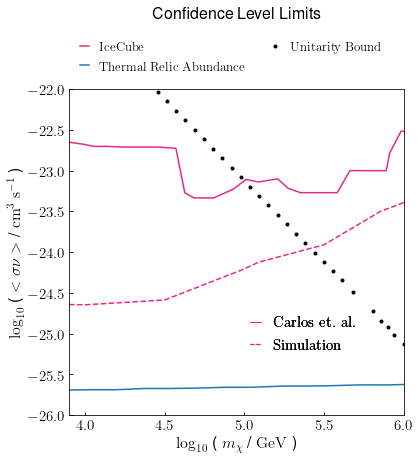

In [12]:
# Limits Comparision ---- TODO: low mass cutoff
#figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
p_name = [r'$\nu_{\mu}$', r'$\nu_{e}$', r'$\nu_{\tau}$']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)

smoothing_val = 3


C_ice_DM = ax1.contour(xx,yy, limits_ice[i],linestyles='--', linewidth=3, colors=color_ice, labels=r'IceCube simulation', levels=[0.95])


ax1.plot(np.log10(cl_lit_HE[:, 0]), np.log10(cl_lit_HE[:, 1]), color_ice , label=r' \textrm{IceCube}')
#ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), color_pone, label=r'P-ONE')
ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), color=color_thermal, 
     label=r'\textrm{Thermal Relic Abundance}')
ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '.',color=color_unitary, 
     label=r'\textrm{Unitarity Bound}')

h_ice, l_ice= C_ice_DM.legend_elements()

C_s = [C_ice_DM]#, C_com_unsm, C_com_sm, C_pone_unsm, C_pone_sm]
h_list = [h_ice[0]]#, h_com_unsm[0], h_com_sm[0], h_pone_unsm[0], h_pone_sm[0]]
labels = [l_ice]#, l_com_unsm, l_com_sm, l_pone_unsm, l_com_sm]

h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.97, +1.1),
             ncol=2, fontsize=fontsize-2, handlelength=h_length,
             fancybox=True, frameon=False)



legend_elements = [Line2D([0], [0], color=color_ice, lw=1),
                   Line2D([0], [0], linestyle='--', color=color_ice,  lw=1.1)
                  ]
labels = [r'$\textrm{Carlos et. al.}$',
           r'$\textrm{Simulation}$']
lgd2= ax1.legend(legend_elements, labels, loc=7, bbox_to_anchor=(0.9, 0.25),
                 ncol=1, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd2)            
#lgd2 = ax1.legend(h_list, labels, loc=7, bbox_to_anchor=(0.8, +0.3),
#             fontsize=fontsize-2, handlelength=h_length, 
#             fancybox=True, frameon=True)
ax1.add_artist(lgd2)
ax1.set_title(r'Confidence Level Limits ', y = 1.2, fontsize=fontsize+1)
ax1.add_artist(lgd1)
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"$\log_{10}$ ( $m_{\chi}$ / $\textrm{GeV}$ )", fontsize=fontsize+1)
ax1.set_ylabel(r"$\log_{10}$ ( $<\sigma \nu>$ / $\textrm{cm}^{3}$ $\textrm{s}^{-1}$ )", fontsize=fontsize+1)
#ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(3.9, max(np.log10(mass_grid)))
ax1.set_ylim(min(np.log10(sv_grid)), -22)  # min(np.log10(sv_grid)), -21

figure.savefig('../pics/Limits_result_ice.png',bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [13]:
a = []
c = []
b = []

/tmp/ipykernel_4569/2932563290.py:10: UserWarning: The following kwargs were not used by contour: 'linewidth', 'labels'
  C_bb = ax1.contour(xx_1,yy_1, limits_pone_bb_un[i],linestyles='--', linewidth=3, colors=color_ice, labels=r'IceCube simulation', levels=[0.95])


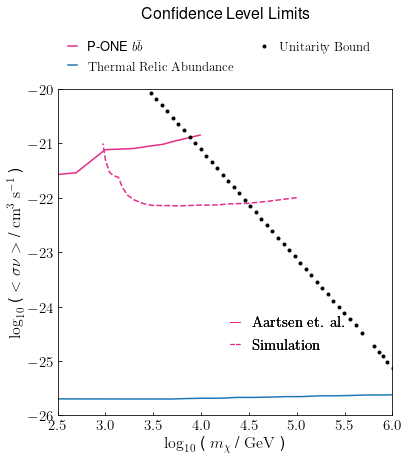

In [14]:
# Limits Comparision ---- TODO: low mass cutoff
#figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
p_name = [r'$\nu_{\mu}$', r'$\nu_{e}$', r'$\nu_{\tau}$']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)

smoothing_val = 3


C_bb = ax1.contour(xx_1,yy_1, limits_pone_bb_un[i],linestyles='--', linewidth=3, colors=color_ice, labels=r'IceCube simulation', levels=[0.95])


ax1.plot(np.log10(cl_lit_bb[:, 0]), np.log10(cl_lit_bb[:, 1]), color_ice , label=r'P-ONE $b\bar{b}$')
#ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), color_pone, label=r'P-ONE')
ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), color=color_thermal, 
     label=r'\textrm{Thermal Relic Abundance}')
ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '.',color=color_unitary, 
     label=r'\textrm{Unitarity Bound}')

h_bb, l_bb = C_bb.legend_elements()

C_s = [C_bb]#, C_com_unsm, C_com_sm, C_pone_unsm, C_pone_sm]
h_list = [h_bb[0]]#, h_com_unsm[0], h_com_sm[0], h_pone_unsm[0], h_pone_sm[0]]
labels = [l_bb]#, l_com_unsm, l_com_sm, l_pone_unsm, l_com_sm]

h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.97, +1.1),
             ncol=2, fontsize=fontsize-2, handlelength=h_length,
             fancybox=True, frameon=False)



legend_elements = [Line2D([0], [0], color=color_ice, lw=1),
                   Line2D([0], [0], linestyle='--', color=color_ice,  lw=1.1)
                  ]
labels = [r'$\textrm{Aartsen et. al.}$',
           r'$\textrm{Simulation}$']
lgd2= ax1.legend(legend_elements, labels, loc=7, bbox_to_anchor=(0.9, 0.25),
                 ncol=1, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd2)            
#lgd2 = ax1.legend(h_list, labels, loc=7, bbox_to_anchor=(0.8, +0.3),
#             fontsize=fontsize-2, handlelength=h_length, 
#             fancybox=True, frameon=True)
ax1.add_artist(lgd2)
ax1.set_title(r'Confidence Level Limits ', y = 1.2, fontsize=fontsize+1)
ax1.add_artist(lgd1)
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"$\log_{10}$ ( $m_{\chi}$ / $\textrm{GeV}$ )", fontsize=fontsize+1)
ax1.set_ylabel(r"$\log_{10}$ ( $<\sigma \nu>$ / $\textrm{cm}^{3}$ $\textrm{s}^{-1}$ )", fontsize=fontsize+1)
#ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which='major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(2.5, max(np.log10(mass_grid)))
ax1.set_ylim(min(np.log10(sv_grid)), -20)  # min(np.log10(sv_grid)), -21

figure.savefig('../pics/Limits_result_bb.png',bbox_inches='tight', dpi=export_dpi, facecolor='white')